In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

%matplotlib inline

Load datasets

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
def getDataInfo(data):
    data.info()
    print('------------ Null values --------------')
    print(train.isnull().sum().sort_values(ascending=False))
    print('------------ Unique values --------------')
    print(train.nunique().sort_values())
    
getDataInfo(train)
print('----------------------------------------')
getDataInfo(test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
------------ Null values --------------
Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket        

<AxesSubplot:>

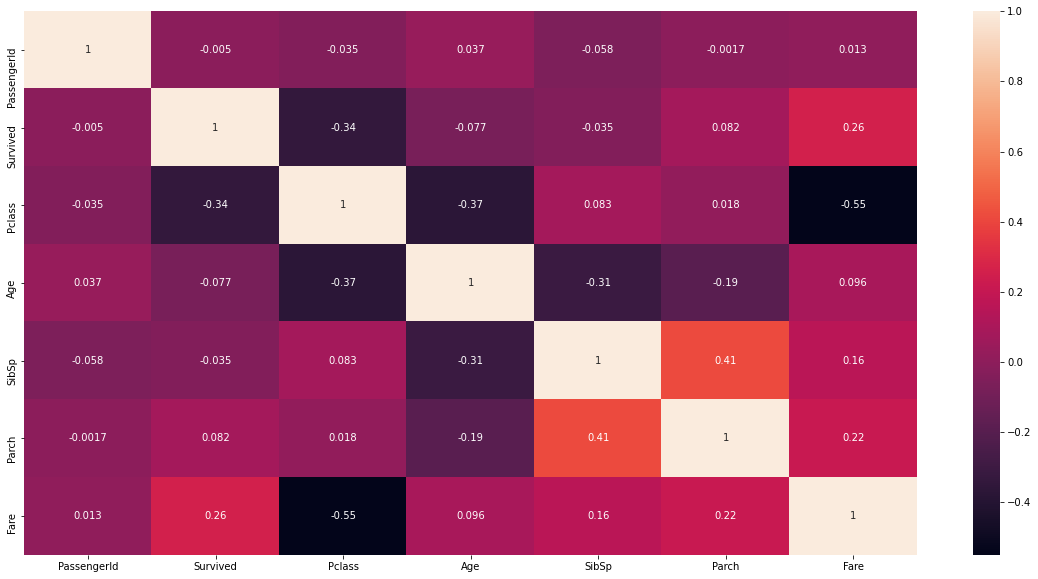

In [5]:
corr = train.corr()
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot = True, ax = ax)

In [6]:
def cleanData(data):
    data.drop(['Cabin', 'Name', 'Ticket'], axis = 1, inplace = True)
    data['Age'] = data.groupby(['Pclass','Sex'])['Age'].transform(lambda x: x.fillna(x.median()))
    data['Fare'] = data.groupby(['Pclass','Sex'])['Fare'].transform(lambda x: x.fillna(x.median()))
    data.dropna(subset=['Embarked'], inplace=True)
    data = pd.get_dummies(data, columns = ['Sex', 'Embarked'])
    return data

clean_train = cleanData(train)
clean_test = cleanData(test)

clean_train.info()
print('----------------------------------------')
clean_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Age          889 non-null    float64
 4   SibSp        889 non-null    int64  
 5   Parch        889 non-null    int64  
 6   Fare         889 non-null    float64
 7   Sex_female   889 non-null    uint8  
 8   Sex_male     889 non-null    uint8  
 9   Embarked_C   889 non-null    uint8  
 10  Embarked_Q   889 non-null    uint8  
 11  Embarked_S   889 non-null    uint8  
dtypes: float64(2), int64(5), uint8(5)
memory usage: 59.9 KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId

In [7]:
clean_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [8]:
clean_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [9]:
Y = clean_train['Survived']
X = clean_train.drop('Survived', axis = 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [10]:
def fitModel(model):
    model.fit(X_train, Y_train)
    prediction = model.predict(X_test)
    return accuracy_score(Y_test, prediction)

LR = LogisticRegression(solver='liblinear', random_state=1)
BNB = BernoulliNB()
GBC = GradientBoostingClassifier()
RFC = RandomForestClassifier()
SGDC = SGDClassifier()
SVC = SVC()

models = [LR, BNB, GBC, RFC, SGDC, SVC]
for model in models:
    print("Model: ", model)
    print("Accuracy: ", fitModel(model))

Model:  LogisticRegression(random_state=1, solver='liblinear')
Accuracy:  0.8277153558052435
Model:  BernoulliNB()
Accuracy:  0.8202247191011236
Model:  GradientBoostingClassifier()
Accuracy:  0.8352059925093633
Model:  RandomForestClassifier()
Accuracy:  0.8352059925093633
Model:  SGDClassifier()
Accuracy:  0.6217228464419475
Model:  SVC()
Accuracy:  0.6629213483146067


In [11]:
model = RandomForestClassifier()
fitModel(model)

0.846441947565543

In [12]:
predict = model.predict(clean_test)

output = pd.DataFrame({'PassengerId': clean_test.PassengerId, 'Survived': predict})
output.to_csv('submission.csv', index=False)

In [13]:
data = pd.read_csv('submission.csv')
data.head()
print(data.shape)

(418, 2)
